In [1]:
%matplotlib inline

from matplotlib import pyplot as plt
import matplotlib.mlab as mlab
import csv
from scipy.stats import norm
import numpy as np
import scipy.stats as stats
import numpy

In [2]:
data = open('../data/data.csv', 'r').readlines()
fieldnames = ['x', 'y', 'z', 'unmasked', 'synapses']
reader = csv.reader(data)
reader.next()

rows = [[int(col) for col in row] for row in reader]

In [3]:
sorted_x = sorted(list(set([r[0] for r in rows])))
sorted_y = sorted(list(set([r[1] for r in rows])))
sorted_z = sorted(list(set([r[2] for r in rows])))

x = list([r[0] for r in rows])
y = list([r[1] for r in rows])
z = list([r[2] for r in rows])

In [4]:
real_volume = numpy.zeros((len(sorted_x), len(sorted_y), len(sorted_z)))
for r in rows:
    real_volume[sorted_x.index(r[0]), sorted_y.index(r[1]), sorted_z.index(r[2])] = r[-1]

In [52]:
XYPlane = numpy.ndarray((len(x), len(y)))
XZPlane = numpy.ndarray((len(x), len(z)))
YZPlane = numpy.ndarray((len(y), len(z)))

for row in rows:
    XYPlane[row[0], row[1]] += row[-1]
    XZPlane[row[0], row[2]] += row[-1]
    YZPlane[row[1], row[2]] += row[-1]

In [48]:
import scipy.signal as sig


In [ ]:
sig.correlate2d(YZPlane,YZPlane)

In [ ]:
sig.correlate2d(XZPlane,XZPlane)

In [ ]:
sig.correlate2d(YZPlane,YZPlane)

In [75]:
XYPlaneShrunk = numpy.zeros((len(sorted_x), len(sorted_y)))
XZPlaneShrunk = numpy.zeros((len(sorted_x), len(sorted_z)))
YZPlaneShrunk = numpy.zeros((len(sorted_y), len(sorted_z)))

for r in rows:
    XYPlaneShrunk[sorted_x.index(r[0]), sorted_y.index(r[1])] += r[-1]
    XZPlaneShrunk[sorted_x.index(r[0]), sorted_z.index(r[2])] += r[-1]
    YZPlaneShrunk[sorted_y.index(r[1]), sorted_z.index(r[2])] += r[-1]
    


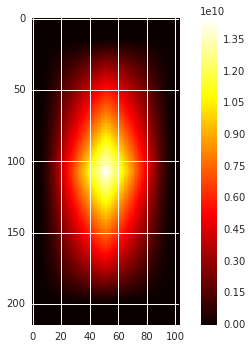

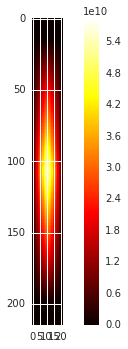

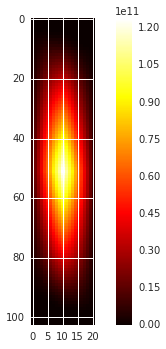

In [77]:
AutoXYPlane = sig.correlate2d(XYPlaneShrunk,XYPlaneShrunk)
AutoXZPlane = sig.correlate2d(XZPlaneShrunk,XZPlaneShrunk)
AutoYZPlane = sig.correlate2d(YZPlaneShrunk,YZPlaneShrunk)


plt.imshow(AutoXYPlane, interpolation='nearest', cmap = 'hot')
plt.colorbar()
plt.show()

plt.imshow(AutoXZPlane, interpolation='nearest', cmap = 'hot')
plt.colorbar()
plt.show()

plt.imshow(AutoYZPlane, interpolation='nearest', cmap = 'hot')
plt.colorbar()
plt.show()





In [71]:
import pandas as pd
import seaborn as sns

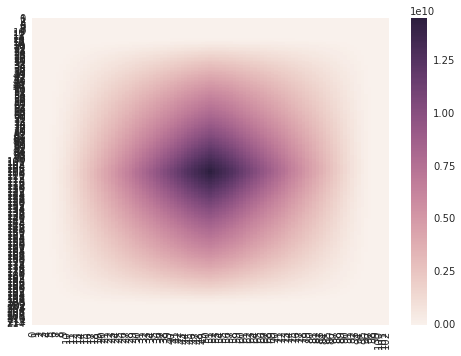

In [72]:
frame = pd.DataFrame(AutoXYPlane)
sns.heatmap(frame)


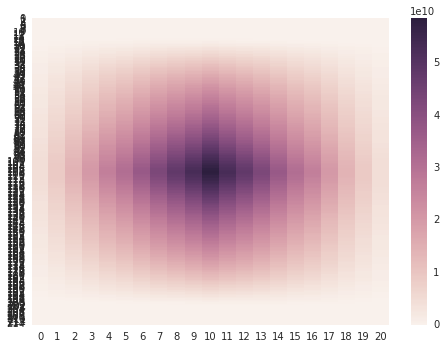

In [73]:

frame = pd.DataFrame(AutoXZPlane)
sns.heatmap(frame)

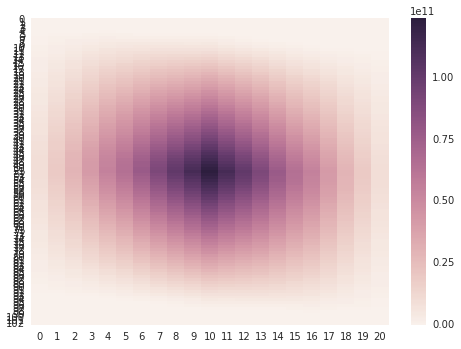

In [42]:
frame = pd.DataFrame(AutoYZPlane)
sns.heatmap(frame)